<a href="https://colab.research.google.com/github/Regis-Caelum/Machine-Learning/blob/main/tutorial_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
pip install matplotlib

In [54]:
pip install scikit-learn

In [55]:
import matplotlib.pyplot as plt

In [56]:
x =[i for i in range(10)]
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [57]:
y = [2*i for i in range(10)]
print(y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


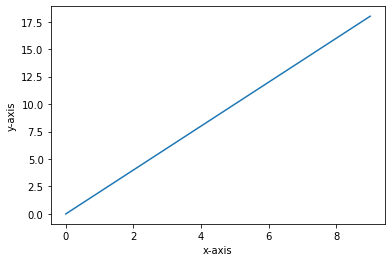

In [58]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y)

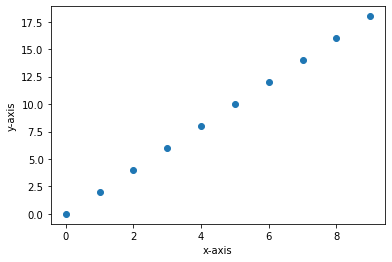

In [59]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(x,y)

No. of features are also known as **Dimension**.
They act as an input to the ML model so that we can get correct label.
No. of rows are also known as **Instances**

In [60]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

x = iris.data
y = iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [62]:
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/UCI_car/car.data')
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [63]:
X = data[[
          'buying',
          'maint',
          'safety'
]].values
Y = data[['class']]

In [64]:
le = LabelEncoder()
for i in range(len(X[0])):
  X[:,i] = le.fit_transform(X[:,i])

In [65]:
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
Y['class'] = Y['class'].map(label_mapping)
Y = np.array(Y)
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [74]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

knn.fit(xtrain, ytrain)

predictions = knn.predict(xtest)
acc = metrics.accuracy_score(ytest, predictions)

print('predictions: ', predictions)
print('accruracy: ', acc)

predictions:  [1 2 2 2 2 0 2 0 1 2 2 0 2 1 1 2 2 0 1 1 2 1 0 0 0 0 0 2 1 1]
accruracy:  0.9333333333333333
